In [0]:
!pip install fastai

In [0]:
from fastai.learner import *

In [0]:
% matplotlib inline

In [0]:
def lin(a,b,x): return a*x + b

In [0]:
def fake_data(n,a,b):
    x = np.random.uniform(0,1,n)
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x,y

In [0]:
x,y = fake_data(50,3.0,8.0)

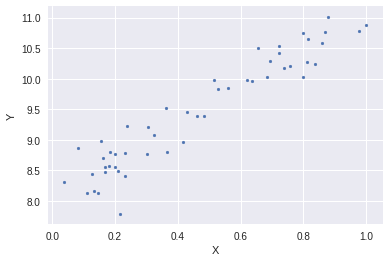

In [8]:
plt.scatter(x,y,s = 8)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [0]:
def mse(y_hat,y): return ((y_hat - y)**2).mean()

In [10]:
y_hat = lin(10,5,x)
mse(y_hat,y)

3.9857768251298595

In [0]:
def mse_loss(a,b,x,y): return mse(lin(a,b,x),y)

In [23]:
mse_loss(10,5,x,y)

Variable containing:
 4.4277
[torch.FloatTensor of size 1]

In [0]:
x,y = fake_data(10000,3.0,8.0)

In [15]:
x.shape,y.shape

((10000,), (10000,))

In [0]:
x,y = V(x),V(y)

In [17]:
a = V(np.random.randn(1),requires_grad = True)
b = V(np.random.randn(1),requires_grad = True)
a,b

(Variable containing:
  1.3323
 [torch.FloatTensor of size 1], Variable containing:
  0.2029
 [torch.FloatTensor of size 1])

In [0]:
learning_rate = 1e-3

In [26]:
for t in range(10000):
  loss = mse_loss(a,b,x,y)
  if t % 1000 == 0: print(loss.data[0])
  loss.backward()
  
  a.data -= learning_rate * a.grad.data
  b.data -= learning_rate * b.grad.data

  a.grad.data.zero_()
  b.grad.data.zero_()
  
  

26.570159912109375
0.27958258986473083
0.12644465267658234
0.11757564544677734
0.11145472526550293
0.1067577600479126
0.10315419733524323
0.10038892924785614
0.09826730936765671
0.09663926810026169


In [29]:
a.data[0],b.data[0]

(2.796562433242798, 8.1134614944458)